## Step 1:

**Import Basic Scikit Learn Libraries for Data Manipulation as well Data Visualization.**


In [1]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Data Filter Warning Libraries
import warnings 
warnings.filterwarnings('ignore')

#Import Data Logging libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s')

## Step 2:

**Data Uploading using Pandas Function**

In [2]:
#Load the dataset

url='https://raw.githubusercontent.com/Saimehtre18/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df=pd.read_csv(url)

df.sample(frac=1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
800,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,7,13.71
33,475.0,0.0,0.0,228.0,0.0,932.0,594.0,270,42.13
952,261.9,110.5,86.1,195.4,5.0,895.2,732.6,28,33.72
1012,325.6,166.4,0.0,174.0,8.9,881.6,790.0,28,61.24
829,273.0,105.0,82.0,210.0,9.0,904.0,680.0,28,37.17
...,...,...,...,...,...,...,...,...,...
571,228.0,342.1,0.0,185.7,0.0,955.8,674.3,28,39.70
59,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,33.02
560,220.8,147.2,0.0,185.7,0.0,1055.0,744.3,28,25.75
867,166.0,260.0,0.0,183.0,13.0,859.0,827.0,28,37.91


## Step 3:

**Doing Exploratory Data Analysis [EDA] :-->**

1. Univariate Analysis

2. Bi Variate Analysis

In [3]:
#Performing Univariate Analysis

from collections import OrderedDict

stats=[]

for i in df.columns:
    numerical_stats= OrderedDict({
        'Feature':i,
        'Type':df[i].dtype,
        'Missing': df[i].isnull().sum(),
        'Unique': df[i].nunique(),
        'Mode': df[i].mode().values[0],
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Min': df[i].min(),
        'Max': df[i].max(),
        'Standard deviation': df[i].std(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'IQR' : df[i].quantile(0.75)-df[i].quantile(0.25),
    })
    
    stats.append(numerical_stats)
    
df_stats = pd.DataFrame(stats)
df_stats
# df_stats.style.background_gradient(subset=['Missing','Mean','Mode','IQR','Kurtosis','Min','Max','Type','Unique','Median','Standard deviation','Skewness'],cmap='Reds')


,Feature,Type,Missing,Unique,Mode,Mean,Median,Min,Max,Standard deviation,Skewness,Kurtosis,IQR
0,cement,float64,0,278,362.6,281.167864,272.900,102.00,540.0,104.506364,0.509481,-0.520652,157.625
1,blast_furnace_slag,float64,0,185,0.0,73.895825,22.000,0.00,359.4,86.279342,0.800717,-0.508175,142.950
2,fly_ash,float64,0,156,0.0,54.188350,0.000,0.00,200.1,63.997004,0.537354,-1.328746,118.300
3,water,float64,0,195,192.0,181.567282,185.000,121.80,247.0,21.354219,0.074628,0.122082,27.100
4,superplasticizer,float64,0,111,0.0,6.204660,6.400,0.00,32.2,5.973841,0.907203,1.411269,10.200
5,coarse_aggregate,float64,0,284,932.0,972.918932,968.000,801.00,1145.0,77.753954,-0.040220,-0.599016,97.400
6,fine_aggregate,float64,0,302,594.0,773.580485,779.500,594.00,992.6,80.175980,-0.253010,-0.102177,93.050
7,age,int64,0,14,28.0,45.662136,28.000,1.00,365.0,63.169912,3.269177,12.168989,49.000
8,concrete_compressive_strength,float64,0,845,33.4,35.817961,34.445,2.33,82.6,16.705742,0.416977,-0.313725,22.425


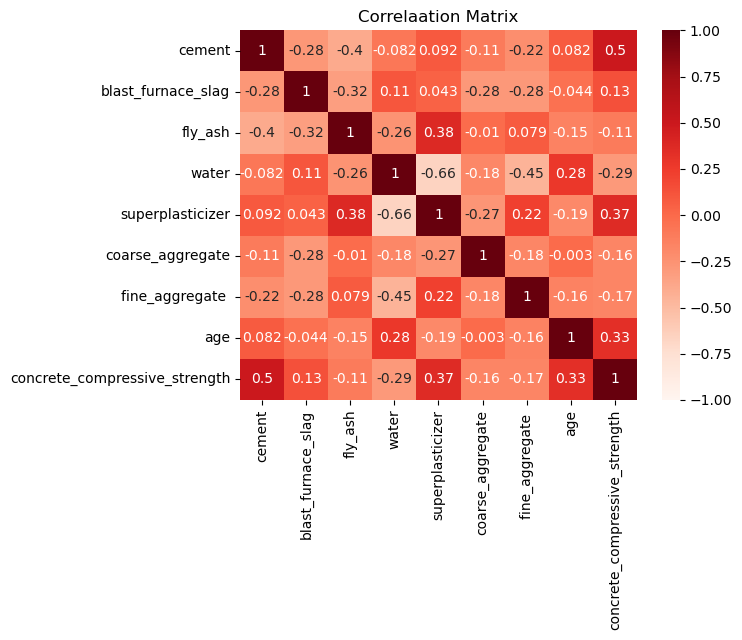

In [4]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ---->['concrete_compressive_strength']
sns.heatmap(df.corr(),annot=True,yticklabels=True,center=0,vmax=1,vmin=-1,cmap='Reds')
plt.title('Correlaation Matrix')
plt.show()

In [5]:
#Understanding Features and create New Features Based on Existing Features-------> Feature Engineering

df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

## **Feature Engineering:**

In [6]:
df['composite_ratio']=1 /((df['cement']+df['superplasticizer']+df['blast_furnace_slag'])/(df['water']))
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,composite_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.298618
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.298618
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.480000
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.480000
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.580060
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.447545
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0.589296
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0.655442
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0.491739


In [7]:
df['Cement_to_Water_Ratio']=1/(df['cement']/df['water'])

In [8]:
#Use Variance Inflation Factor (VIF) to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=df.drop(columns=['concrete_compressive_strength'])  #All Independent Variables
X=X.assign(constant=1)

vif_data=pd.DataFrame()
vif_data['Feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]

#Drop the constant column from the result
vif_data=vif_data[vif_data['Feature']!='constant']

#Display VIF values
print(vif_data)

                 Feature        VIF
0                 cement  15.088325
1     blast_furnace_slag  10.976848
2                fly_ash   6.227664
3                  water   8.350680
4       superplasticizer   3.029723
5       coarse_aggregate   5.160920
6        fine_aggregate    7.073428
7                    age   1.123347
8        composite_ratio   9.196649
9  Cement_to_Water_Ratio   7.295439


## **Data Insights:**

1. Higher Value of VIF Suggest Multi Colinearity. [VIF > 10]---->Column Shows Multi Colinearity

2. Such Columns Must be removed before applying any Regression Model 

In [9]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
composite_ratio                 -0.584858
Cement_to_Water_Ratio           -0.500692
Name: concrete_compressive_strength, dtype: float64

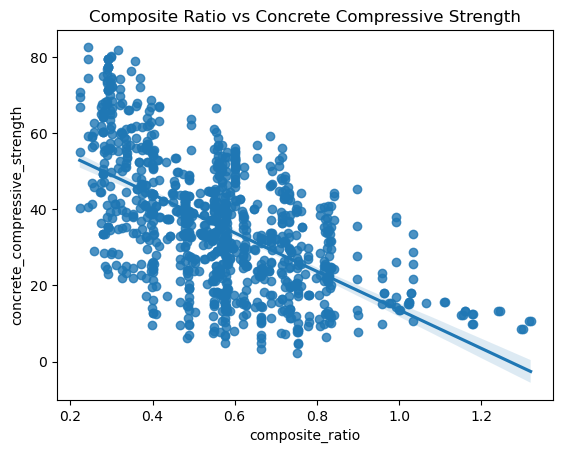

In [10]:
sns.regplot(x=df['composite_ratio'],y=df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')
plt.show()

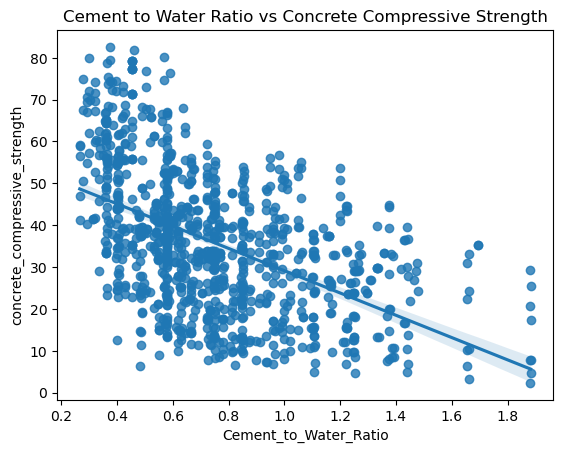

In [11]:
sns.regplot(x=df['Cement_to_Water_Ratio'],y=df['concrete_compressive_strength'])
plt.title("Cement to Water Ratio vs Concrete Compressive Strength")
plt.show()

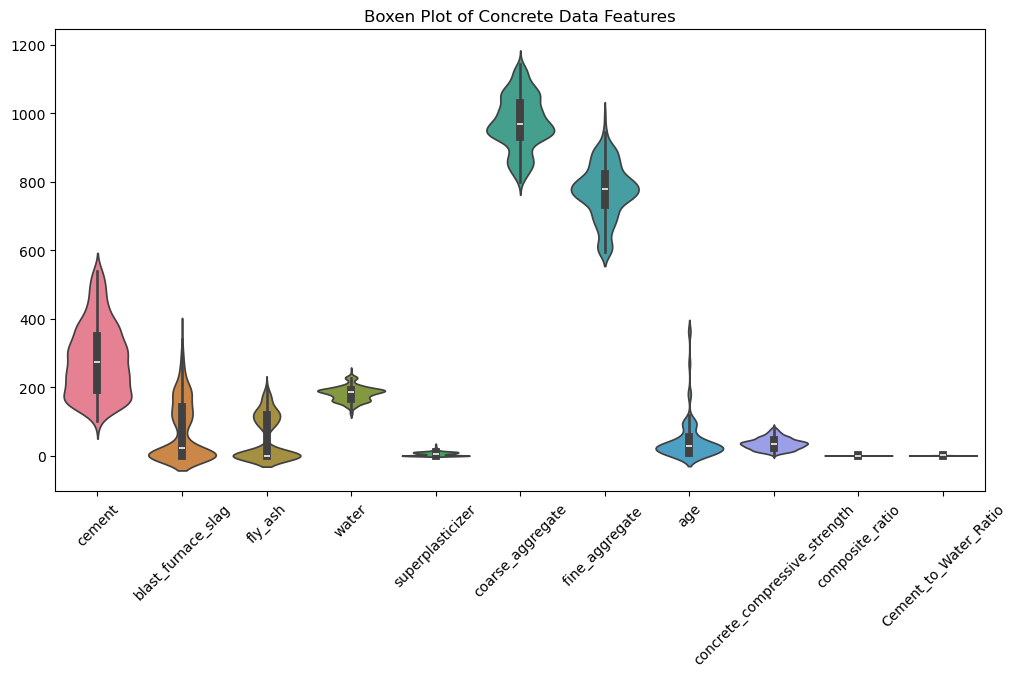

In [34]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxen Plot of Concrete Data Features")
plt.show()

### STEP 4: **1.Splitting the dataset into Training and Testing Datasets.Also Using Train and Test split to Prevent data Leakage**

In [12]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='concrete_compressive_strength',axis=1)
y=df['concrete_compressive_strength']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
#Using Scaling Technique
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression

LR= LinearRegression()

LR.fit(X_train,y_train)
y_pred_LR=LR.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

r2_score_LR = r2_score(y_test,y_pred_LR)
r2_score_LR 

0.6062392634611877

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()

RF.fit(X_train,y_train)

y_pred_RF=RF.predict(X_test)

r2_score_RF = r2_score(y_test,y_pred_RF)
print(f'The R2 Score for 'r2_score_RF)

0.8942301739783189

In [20]:
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor()

DT.fit(X_train,y_train)

y_pred_DT=DT.predict(X_test)

r2_score_DT=r2_score(y_test,y_pred_DT)
r2_score_DT

0.8440419870909779

In [21]:
#checking Model Performance 

mse_LR =mean_squared_error(y_test, y_pred_LR)
mse_DT= mean_squared_error(y_test, y_pred_DT)

mae_LR = mean_absolute_error(y_test, y_pred_LR)
mae_DT = mean_absolute_error(y_test, y_pred_DT)

print(f'The mean squared error for Linear Regression Model: {mse_LR}')

print(f'The mean absolute error for Linear Regression Model: {mae_LR}')

print(f'The mean squared error for Decision Tree Model: {mse_DT}')

print(f'The mean absolute error for Decision Tree Model: {mae_DT}')

The mean squared error for Linear Regression Model: 106.5415223933751
The mean absolute error for Linear Regression Model: 8.108917548931988
The mean squared error for Decision Tree Model: 42.198224919093846
The mean absolute error for Decision Tree Model: 4.28915857605178


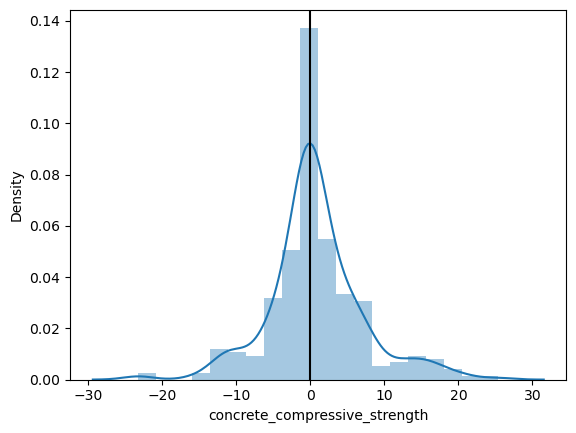

In [33]:
sns.distplot(y_test - y_pred_DT,bins=20)
plt.axvline(0,color='k')

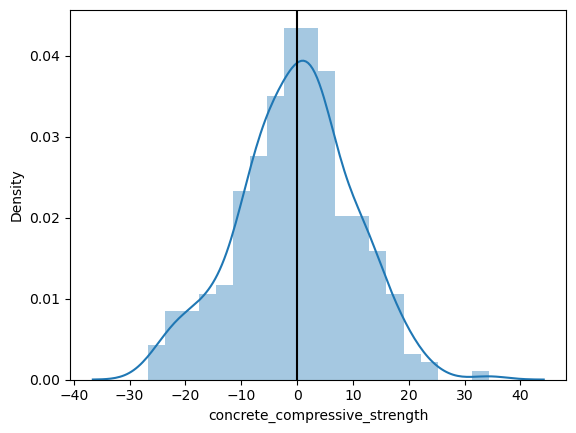

In [35]:
sns.distplot(y_test - y_pred_LR,bins=20)
plt.axvline(0,color='k')

In [25]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 5.0/150.0 MB 27.4 MB/s eta 0:00:06
   --- ------------------------------------ 11.5/150.0 MB 28.9 MB/s eta 0:00:05
   ---- ----------------------------------- 18.4/150.0 MB 30.5 MB/s eta 0:00:05
   ------ --------------------------------- 25.4/150.0 MB 25.2 MB/s eta 0:00:05
   -------- ------------------------------- 31.7/150.0 MB 25.8 MB/s eta 0:00:05
   ---------- ----------------------------- 37.7/150.0 MB 26.1 MB/s eta 0:00:05
   ----------- ---------------------------- 44.3/150.0 MB 26.6 MB/s eta 0:00:04
   ------------- -------------------------- 50.6/150.0 MB 26.8 MB/s eta 0:00:04
   --------------- ------------------------ 57.4/150.0 MB 27.5 MB/s eta 0:00:04
   ---------------- ----------------------- 62.9/150.0 MB 27.3 MB/s eta 0:00:04
   ------------------ --------------------- 69.2/150

In [26]:
#Using XGB Bossting Algorithm

import xgboost as xgb

XGB = xgb.XGBRegressor()

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)

r2_score_XGB = r2_score(y_test, y_pred_XGB)

print(f'The R2 Score for XGBoost Model: {r2_score_XGB}')


The R2 Score for XGBoost Model: 0.922418269604486


In [27]:
!pip install adaboost

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement adaboost (from versions: none)
ERROR: No matching distribution found for adaboost


In [31]:
from sklearn.ensemble import AdaBoostRegressor
ADA=AdaBoostRegressor()

ADA.fit(X_train, y_train)

y_pred_ADA = ADA.predict(X_test)

r2_score_ADA = r2_score(y_test, y_pred_ADA)

print(f'The R2 Score for AdaBoost Model: {r2_score_ADA}')

The R2 Score for AdaBoost Model: 0.8037439971170349
